This small project is aimed at practicing:

--Data analysis and visualization
--Choosing a supervised Machine Leanring algorithm to predict readmissions in the hospital
--investigating the chosen ML model in terms of most important features selected and the effect of these features in predicting the outcome.

In [69]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots
import shap

# EDA

In [3]:
data = pd.read_csv('hospital-readmissions-orig.csv')

In [4]:
data.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,readmitted
0,2,1,3,1,1,7,2,44,1,16,0,0,0,8.0,250.43,403.0,7,0
1,2,1,4,1,1,7,1,51,0,8,0,0,0,197.0,157.00,250.0,5,0
2,2,0,8,2,1,4,13,68,2,28,0,0,0,398.0,427.00,38.0,8,0
3,2,0,9,3,3,4,12,33,3,18,0,0,0,434.0,198.00,486.0,8,0
4,0,1,6,2,1,4,7,62,0,11,0,0,0,157.0,288.00,197.0,7,1


In [6]:
data.info()
#there are 18 variables, all numeric. The dataset is fairly large, 59,557 obs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59557 entries, 0 to 59556
Data columns (total 18 columns):
race                        59557 non-null int64
gender                      59557 non-null int64
age                         59557 non-null int64
admission_type_id           59557 non-null int64
discharge_disposition_id    59557 non-null int64
admission_source_id         59557 non-null int64
time_in_hospital            59557 non-null int64
num_lab_procedures          59557 non-null int64
num_procedures              59557 non-null int64
num_medications             59557 non-null int64
number_outpatient           59557 non-null int64
number_emergency            59557 non-null int64
number_inpatient            59557 non-null int64
diag_1                      59557 non-null float64
diag_2                      59557 non-null float64
diag_3                      59557 non-null float64
number_diagnoses            59557 non-null int64
readmitted                  59557 non-null int64
dty

In [8]:
data['readmitted'].value_counts()
#the chosen outcome valuable, the state of readmission, takes two values, 0 for 'no', and 1 for 'yes'. 
#Immediately, it is evident that the outcome variable is not very well balanced, as there are more 'no' cases.

0    49296
1    10261
Name: readmitted, dtype: int64

Already, it is possible to infer that the machine learning problem working in with this dataset will be as follows: since we have an outcome variable which we want to learn hpw to predict, we know, we will be applying a supervized machine learning problem. In addition, since we are predicting whether a datapoint will fall onto either of two classes, this will have to be a supervised calssification algorithm.

Since there are quite a few variables, it is not so easy at the very beginning to infer which will prove to be important for analysis. For now, I will make the assumption that readmission is something that purely depends on medical factors, hence will exclude variables such as gender, age and race of patient out fo the analysis. 

In [12]:
#create a dataset that will purely be used for eda and applying the algorithms after.
data_a = pd.DataFrame(data.drop(['race','gender','age'],axis=1))
data_a.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,readmitted
0,1,1,7,2,44,1,16,0,0,0,8.0,250.43,403.0,7,0
1,1,1,7,1,51,0,8,0,0,0,197.0,157.00,250.0,5,0
2,2,1,4,13,68,2,28,0,0,0,398.0,427.00,38.0,8,0
3,3,3,4,12,33,3,18,0,0,0,434.0,198.00,486.0,8,0
4,2,1,4,7,62,0,11,0,0,0,157.0,288.00,197.0,7,1


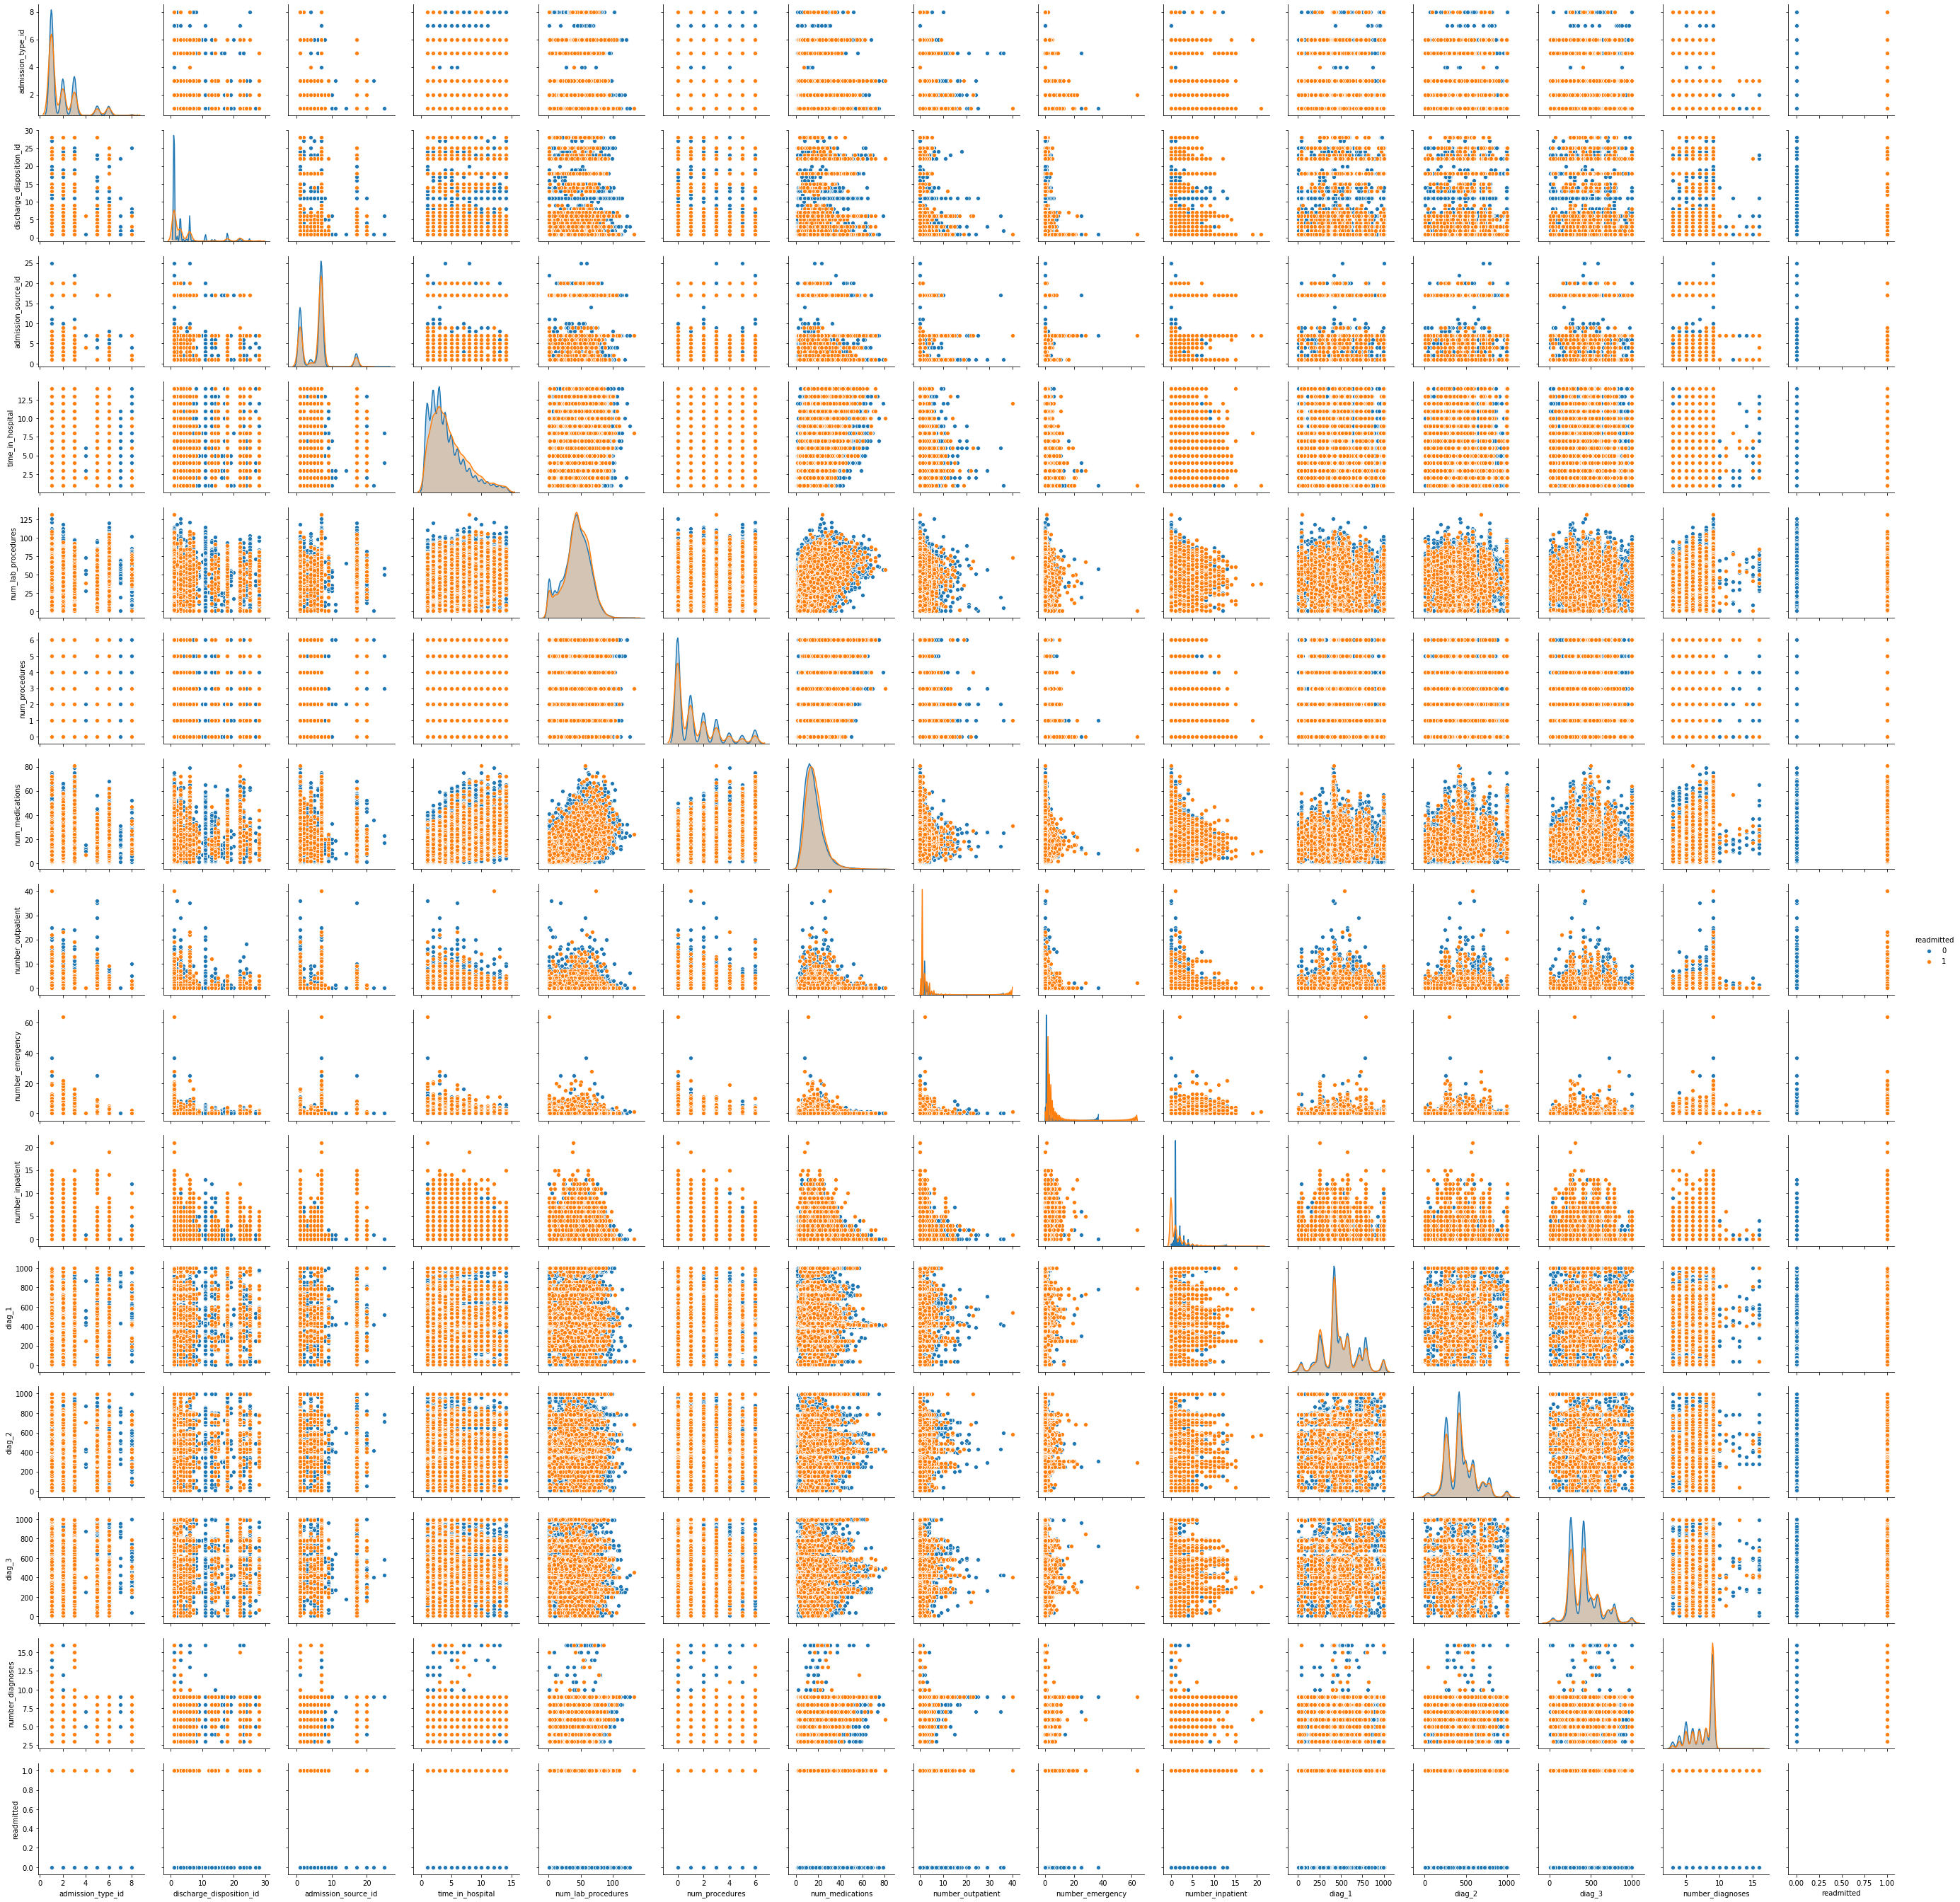

In [14]:
sb.pairplot(data_a, hue='readmitted')
#do not see any linear relationships between variables. In addition, do not see anything normally distributed.

Looking into the data overall, does not seem to highlight any interesting relationships, nor any evident differences between the patients who were readmitted as opposed to those not readmitted. 

That being said, I would still ike to look a bit deeper into certain variables and exclude others. Those, I think will not be able to give any important insights (because there is also limited information to me, what they mean) are the ID variables.

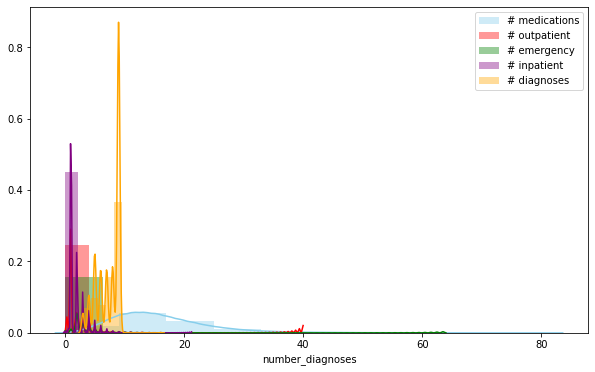

In [28]:
#plotting a few variables on their own
plt.figure(figsize=(10,6))
sb.distplot( data_a["num_medications"] , color="skyblue", label="# medications", bins=10)
sb.distplot( data_a["number_outpatient"] , color="red", label="# outpatient", bins=10)
sb.distplot( data_a["number_emergency"] , color="green", label="# emergency", bins=10)
sb.distplot( data_a["number_inpatient"] , color="purple", label="# inpatient", bins=10)
sb.distplot( data_a["number_diagnoses"] , color="orange", label="# diagnoses", bins=10)
plt.legend()
#none if the below plotted variables are categorical, they are all numerical continuous.

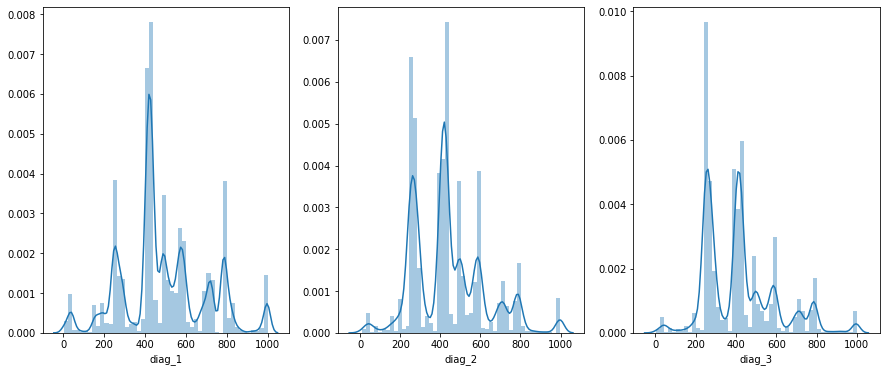

<Figure size 1080x504 with 0 Axes>

In [38]:
f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,6))
plt.figure(figsize=(15,7))
sb.distplot(data_a['diag_1'], ax=ax1)
sb.distplot(data_a['diag_2'], ax=ax2 )
sb.distplot(data_a['diag_3'], ax=ax3 )

plt.show()
#diagnosis variables are also continous, and do not follow a normal distribution.

In [41]:
data_a.describe()
#can infer a few things: 1) no missing values,
#mean time in hospital is 4.38 days,
#mean number of lab procedures is 43.2
#mean number of procedures is 1.4,
#mean number of medications is 16

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,readmitted
count,59557.000000,59557.000000,59557.000000,59557.000000,59557.000000,59557.000000,59557.000000,59557.000000,59557.000000,59557.000000,59557.000000,59557.000000,59557.000000,59557.000000,59557.000000
mean,2.004735,3.915140,5.720352,4.381013,43.273251,1.419145,16.109592,0.302870,0.153970,0.518478,490.566636,439.377272,416.918625,7.414275,0.172289
std,1.422788,5.477445,4.065662,2.974803,19.791889,1.749307,8.460186,1.093617,0.750446,1.150570,204.323718,179.455006,179.114003,1.878637,0.377634
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,8.000000,5.000000,3.000000,0.000000
25%,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,410.000000,276.000000,272.000000,6.000000,0.000000
50%,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,436.000000,425.000000,402.000000,8.000000,0.000000
75%,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,596.000000,535.000000,496.000000,9.000000,0.000000
max,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,40.000000,64.000000,21.000000,999.000000,999.000000,999.000000,16.000000,1.000000


From the above description, want to run a few boxplots just to infer some relationship between readmissions and other variables:

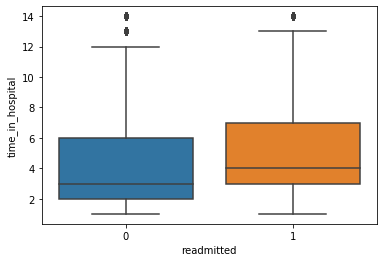

In [42]:
sb.boxplot(data=data_a, x='readmitted', y='time_in_hospital')

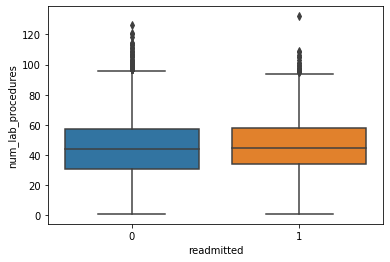

In [43]:
sb.boxplot(data=data_a, x='readmitted', y='num_lab_procedures')

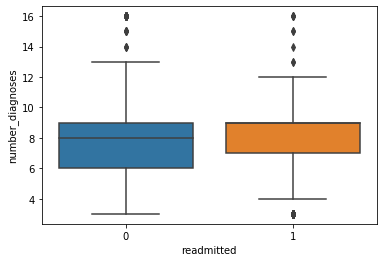

In [45]:
sb.boxplot(data=data_a, x='readmitted', y='number_diagnoses')

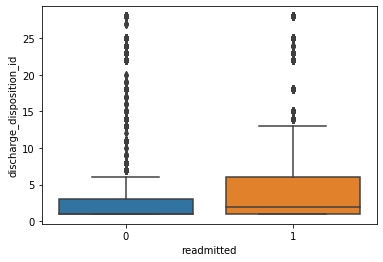

In [51]:
sb.boxplot(data=data_a,x='readmitted', y='discharge_disposition_id')

In [52]:
data_a = data_a.drop(['admission_type_id','discharge_disposition_id','admission_source_id'],axis=1)
data_a.corr()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,readmitted
time_in_hospital,1.000000,0.347780,0.196098,0.478804,-0.012231,-0.007528,0.073687,-0.101772,0.068550,0.089729,0.221226,0.066325
num_lab_procedures,0.347780,1.000000,0.059304,0.267716,-0.020917,-0.013212,0.040083,-0.088687,0.012006,0.034454,0.161488,0.033831
num_procedures,0.196098,0.059304,1.000000,0.407145,-0.028942,-0.046027,-0.067430,-0.021919,0.061812,0.053257,0.055173,-0.028820
num_medications,0.478804,0.267716,0.407145,1.000000,0.034280,0.007085,0.054604,-0.013144,0.077504,0.079237,0.241083,0.051345
number_outpatient,-0.012231,-0.020917,-0.028942,0.034280,1.000000,0.098525,0.105576,-0.005006,0.019516,0.022862,0.089861,0.056077
number_emergency,-0.007528,-0.013212,-0.046027,0.007085,0.098525,1.000000,0.271095,-0.007287,-0.002541,0.006573,0.060706,0.123956
number_inpatient,0.073687,0.040083,-0.067430,0.054604,0.105576,0.271095,1.000000,-0.027549,0.006129,0.017469,0.115471,0.265756
diag_1,-0.101772,-0.088687,-0.021919,-0.013144,-0.005006,-0.007287,-0.027549,1.000000,0.002521,-0.011487,-0.015769,-0.023276
diag_2,0.068550,0.012006,0.061812,0.077504,0.019516,-0.002541,0.006129,0.002521,1.000000,0.070909,0.142169,0.003307
diag_3,0.089729,0.034454,0.053257,0.079237,0.022862,0.006573,0.017469,-0.011487,0.070909,1.000000,0.174205,0.027764


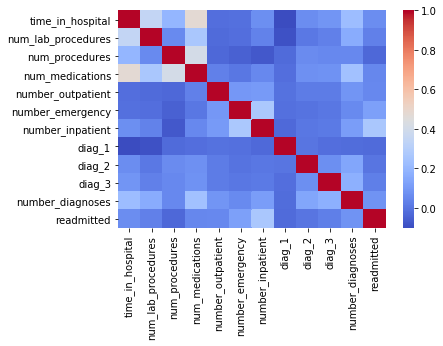

In [54]:
sb.heatmap(data_a.corr(),cmap='coolwarm')

Still, it does not seem that readmisssion is correlated with anything. Nor any other variables seem to be much correlated to each other. The highest correlation observed is between number of medications and time spent in hospital.

Still, this being a supervised classification problem, will try two algorithms: support vector and logistic regression.

In [70]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [65]:
#set up feature names object
feature_names = [i for i in data_a.columns[:-1] if data_a[i].dtype in [np.int64]] 
feature_names

['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

In [66]:
#set the portion of the data to be the explanatory variables X based using the featuer names object.
X = data_a[feature_names]

In [67]:
y = data_a['readmitted']

In [68]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.33, random_state=42)

# Support Vector Machine

In [71]:
svm = SVC().fit(train_X,train_y)

In [74]:
prediction_svm = svm.predict(val_X)

In [75]:
print(confusion_matrix(val_y,prediction_svm))
print('\n')
print(classification_report(val_y,prediction_svm))

[[16111    91]
 [ 3358    94]]


              precision    recall  f1-score   support

           0       0.83      0.99      0.90     16202
           1       0.51      0.03      0.05      3452

    accuracy                           0.82     19654
   macro avg       0.67      0.51      0.48     19654
weighted avg       0.77      0.82      0.75     19654



Would not say that this model is ideal for the case. Predictions seem to only be accurate at 50% cases when predicting that the patient was readmitted.

# Logistic regression

In [76]:
log = LogisticRegression().fit(train_X,train_y)

In [77]:
prediction_log = log.predict(val_X)

In [78]:
print(confusion_matrix(val_y,prediction_log))
print('\n')
print(classification_report(val_y,prediction_log))

[[16025   177]
 [ 3158   294]]


              precision    recall  f1-score   support

           0       0.84      0.99      0.91     16202
           1       0.62      0.09      0.15      3452

    accuracy                           0.83     19654
   macro avg       0.73      0.54      0.53     19654
weighted avg       0.80      0.83      0.77     19654



The logistic regression performed better in predicting whether the patient will be readmitted. 62% cases more successful.

I decided to also try the random forest classifier.

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
forest = RandomForestClassifier().fit(train_X,train_y)
#fit a model with 2 trees

In [90]:
prediction_for = forest.predict(val_X)

In [92]:
print(confusion_matrix(val_y,prediction_for))
print('\n')
print(classification_report(val_y,prediction_for))
#seems that form the available options logistic regression works the best in predicting the readmission

[[15446   756]
 [ 3027   425]]


              precision    recall  f1-score   support

           0       0.84      0.95      0.89     16202
           1       0.36      0.12      0.18      3452

    accuracy                           0.81     19654
   macro avg       0.60      0.54      0.54     19654
weighted avg       0.75      0.81      0.77     19654



IMPORTANT NOTE: for now, I have settled for a base model of losgistic regression. There are still ways to fine tune it. For now I will stick to what we have and focus implementing model explanability techniques. First, permutation.

In [93]:
import eli5

In [94]:
from eli5.sklearn import PermutationImportance

In [97]:
perm = PermutationImportance(log, random_state=4).fit(val_X, val_y)

In [98]:
eli5.show_weights(perm, feature_names = val_X.columns.tolist())
#the table below shows that in the logistic regression model, the feature that affects the accuracy most after 
#being randomly permutated is "number_inpatient"

Weight,Feature
0.0167 ± 0.0007,number_inpatient
0.0013 ± 0.0004,number_emergency
-0.0001 ± 0.0001,num_lab_procedures
-0.0003 ± 0.0003,num_procedures
-0.0004 ± 0.0002,number_outpatient
-0.0005 ± 0.0005,number_diagnoses
-0.0005 ± 0.0005,num_medications
-0.0011 ± 0.0005,time_in_hospital


The table above shows that in the logistic regression model, the feature that affects the accuracy most in the case of being randomly permutated is "number_impatient". Next, I will employ partial dependence, to see how dynamic is a feature with respect to the readmissions variable.

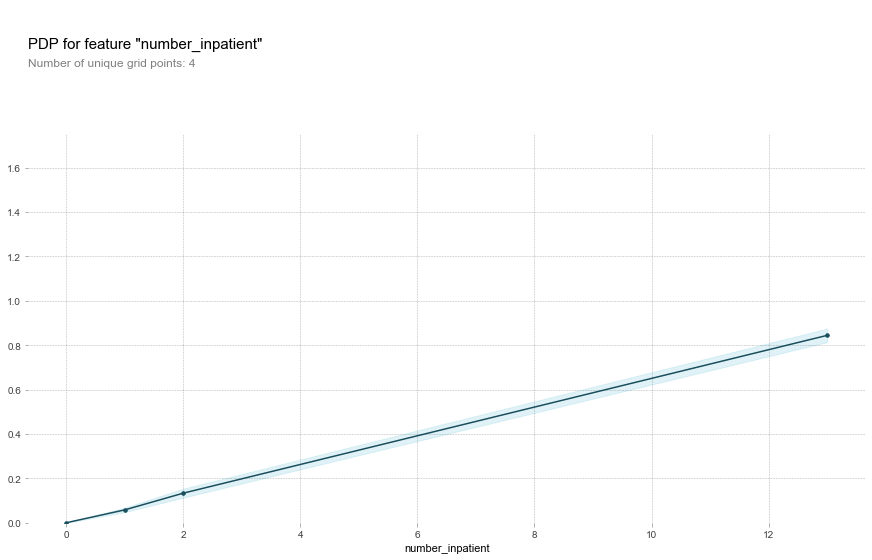

In [109]:
feature_to_plot = 'number_inpatient'
pdp_dist = pdp.pdp_isolate(model=log, dataset=val_X, model_features=val_X.columns, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

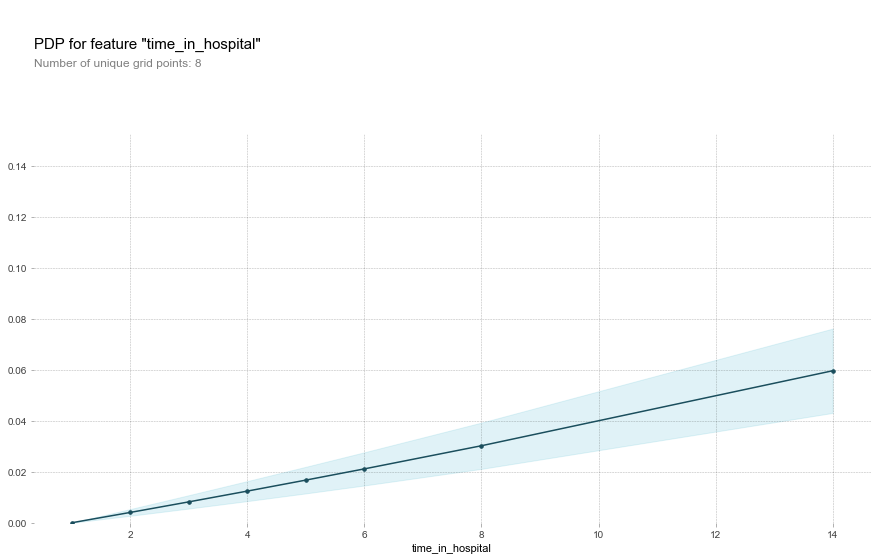

In [110]:
feature_to_plot = 'time_in_hospital'
pdp_dist = pdp.pdp_isolate(model=log, dataset=val_X, model_features=val_X.columns, feature=feature_to_plot)

pdp.pdp_plot(pdp_dist, feature_to_plot)
plt.show()

Will implement SHAP values method to infer the magnitude of importance if each featuer in predicting readmissions.

In [107]:
import shap

In [121]:
data = pd.read_csv('FIFA 2018 Statistics.csv')
y = (data['Man of the Match'] == "Yes")  # Convert from string "Yes"/"No" to binary
feature_names = [i for i in data.columns if data[i].dtype in [np.int64, np.int64]]
X = data[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

In [124]:
row_to_show = 5
data_for_prediction = val_X.iloc[row_to_show] 
data_for_prediction

Goal Scored                 2
Ball Possession %          38
Attempts                   13
On-Target                   7
Off-Target                  4
Blocked                     2
Corners                     6
Offsides                    1
Free Kicks                 18
Saves                       1
Pass Accuracy %            69
Passes                    399
Distance Covered (Kms)    148
Fouls Committed            25
Yellow Card                 1
Yellow & Red                0
Red                         0
Goals in PSO                3
Name: 118, dtype: int64

In [128]:
explainer = shap.TreeExplainer(my_model)
shap_values = explainer.shap_values(data_for_prediction)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)